In [4]:
energy <- read.table("../data/residuals_energy.txt", header = TRUE)
energy_res = energy$x

In [5]:
library(readxl)

In [6]:
finance <- read.table("../data/residuals_finance.txt", header = TRUE)
finance_res = finance$V1

In [3]:
library(parallel)
library(xts)
library(fUnitRoots)
library(forecast)
library(future)
library(tseries)
library(urca)
library(fGarch)
# library(FinTS)
library(VineCopula)
library(rugarch)

library(ggplot2)
library(gridExtra)
# c("snorm", "ged", "sged", "std", "sstd", "QMLE", "norm")

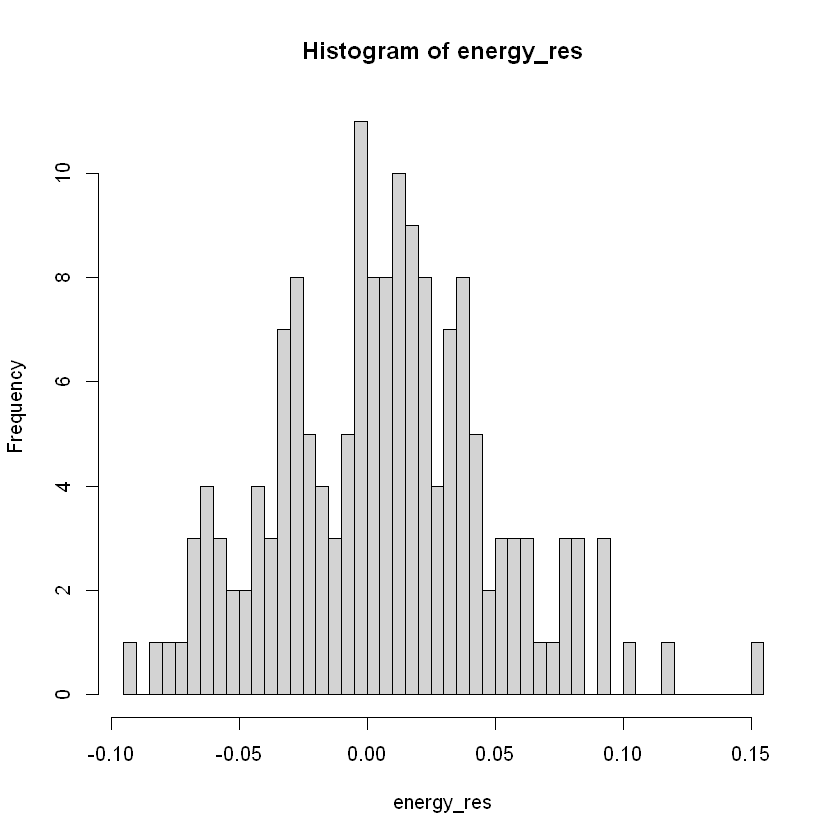

In [66]:
p1 = hist(energy_res, breaks = 40)

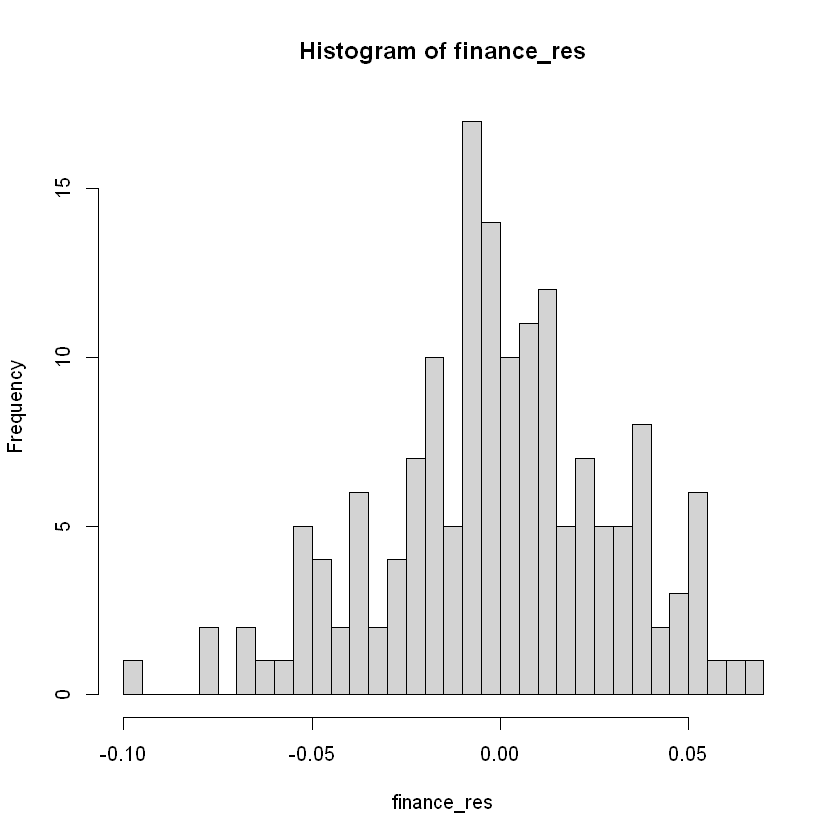

In [67]:
p2 = hist(finance_res, breaks = 40)

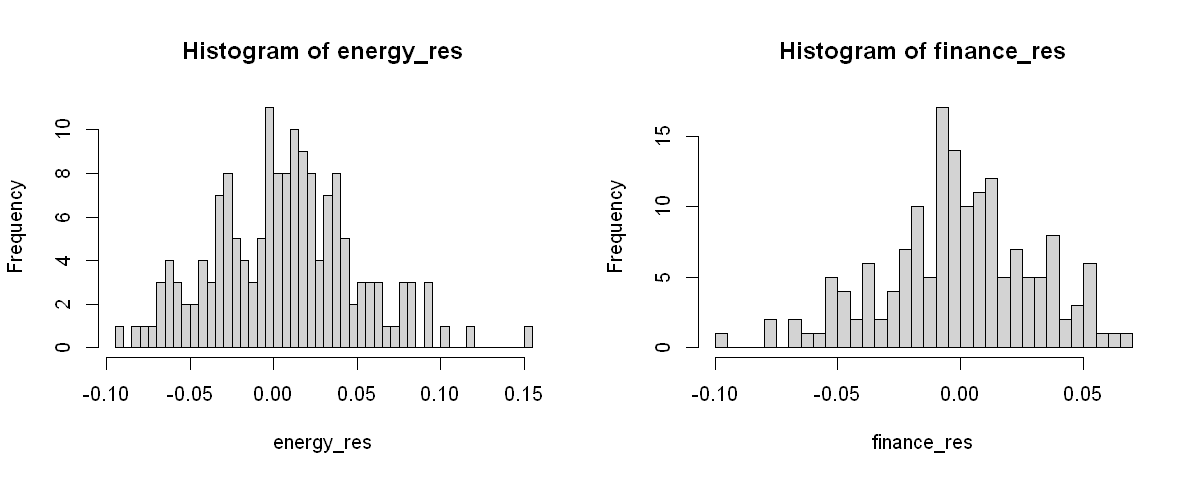

In [71]:
options(repr.plot.width = 10, repr.plot.height = 4)
par(mfrow = c(1, 2))
p1 = hist(energy_res, breaks = 40)
p2 = hist(finance_res, breaks = 40)
par(mfrow = c(1, 1)) # return to the default

In [48]:
library("Rfast")
library("ramify")
library("LambertW")

x<-na.omit(energy_res) #Store the target data 
x<-na.omit(x)           #remove "NA" in the dataset
x<-as.matrix(x)         #ensure that the data is in matrix form
df=seq(1,100,0.001)       #set the range of degree of freedom (e.g. df=[2,2.001,...,8])
n=length(df)            
loglik=rep(0,n)         #Used to store the value of loglikelihood function for different level of df
for(i in 1:n){
  fitres=mvt.mle(x,v=df[i])
  loglik[i]=fitres$loglik
}                   #For each df, calculate the MLE and loglikelihood function
loglik<-as.matrix(loglik)
dfmax=df[argmax(loglik,rows=FALSE)] #Find the maximizier(optimal df)
fitMLE=mvt.mle(x,v=dfmax) #Estimate the MLE of the parameters

m<-fitMLE$location            #m=mu (location)
s<-sqrt(fitMLE$scatter[1,1])  #s=lambda (scale parameter)
print(m)
print(s)
print(dfmax)

ks_test_t(x,c(location=m,scale=s,df=dfmax)) #do the testing using ks.test

Loading required package: Rcpp

Loading required package: RcppZiggurat


Rfast:  2.0.8

 ___ __ __ __ __    __ __ __ __ __ _             _               __ __ __ __ __     __ __ __ __ __ __   
|  __ __ __ __  |  |  __ __ __ __ _/            / \             |  __ __ __ __ /   /__ __ _   _ __ __\  
| |           | |  | |                         / _ \            | |                        / /          
| |           | |  | |                        / / \ \           | |                       / /          
| |           | |  | |                       / /   \ \          | |                      / /          
| |__ __ __ __| |  | |__ __ __ __           / /     \ \         | |__ __ __ __ _        / /__/\          
|    __ __ __ __|  |  __ __ __ __|         / /__ _ __\ \        |_ __ __ __ _   |      / ___  /           
|   \              | |                    / _ _ _ _ _ _ \                     | |      \/  / /       
| |\ \             | |                   / /           \ \                 

[1] 0.006562638
[1] 0.04108001
[1] 29.75



	One-sample Kolmogorov-Smirnov test student-t with df=29.75,
	location=0.01, scale=0.04

data:  x
D = 0.038596, p-value = 0.971
alternative hypothesis: two-sided


In [52]:
library(goftest)
x<-na.omit(energy_res)
x2=(x-m)/s
ad.test(x2,null = "pt",df=dfmax)


	Anderson-Darling test of goodness-of-fit
	Null hypothesis: Student's t distribution
	with parameter df = 29.75
	Parameters assumed to be fixed

data:  x2
An = 0.27352, p-value = 0.9566


In [72]:
library("Rfast")
library("ramify")
library("LambertW")

x<-na.omit(finance_res) #Store the target data 
x<-na.omit(x)           #remove "NA" in the dataset
x<-as.matrix(x)         #ensure that the data is in matrix form
df=seq(1,100,0.001)       #set the range of degree of freedom (e.g. df=[2,2.001,...,8])
n=length(df)            
loglik=rep(0,n)         #Used to store the value of loglikelihood function for different level of df
for(i in 1:n){
  fitres=mvt.mle(x,v=df[i])
  loglik[i]=fitres$loglik
}                   #For each df, calculate the MLE and loglikelihood function
loglik<-as.matrix(loglik)
dfmax=df[argmax(loglik,rows=FALSE)] #Find the maximizier(optimal df)
fitMLE=mvt.mle(x,v=dfmax) #Estimate the MLE of the parameters

m<-fitMLE$location            #m=mu (location)
s<-sqrt(fitMLE$scatter[1,1])  #s=lambda (scale parameter)
print(m)
print(s)
print(dfmax)

ks_test_t(x,c(location=m,scale=s,df=dfmax)) #do the testing using ks.test

[1] -0.001115763
[1] 0.03059749
[1] 100



	One-sample Kolmogorov-Smirnov test student-t with df=100, location=0,
	scale=0.03

data:  x
D = 0.061558, p-value = 0.5792
alternative hypothesis: two-sided


In [73]:
library(goftest)
x<-na.omit(energy_res)
x2=(x-m)/s
ad.test(x2,null = "pt",df=100)

ad.test(x2,null = "pt",df=500)


	Anderson-Darling test of goodness-of-fit
	Null hypothesis: Student's t distribution
	with parameter df = 100
	Parameters assumed to be fixed

data:  x2
An = 9.0992, p-value = 3.243e-05



	Anderson-Darling test of goodness-of-fit
	Null hypothesis: Student's t distribution
	with parameter df = 500
	Parameters assumed to be fixed

data:  x2
An = 9.4455, p-value = 2.107e-05


In [75]:
library(goftest)
x<-na.omit(finance_res)
x2=(x-m)/s
ad.test(x2,null = "pnorm")


	Anderson-Darling test of goodness-of-fit
	Null hypothesis: Normal distribution
	Parameters assumed to be fixed

data:  x2
An = 0.4481, p-value = 0.7998


In [49]:
# snormFit(energy_res)

In [50]:
# stdFit(finance_res)


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  x1
D = 0.038087, p-value = 0.9744
alternative hypothesis: two-sided



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  x2
D = 0.063733, p-value = 0.5341
alternative hypothesis: two-sided


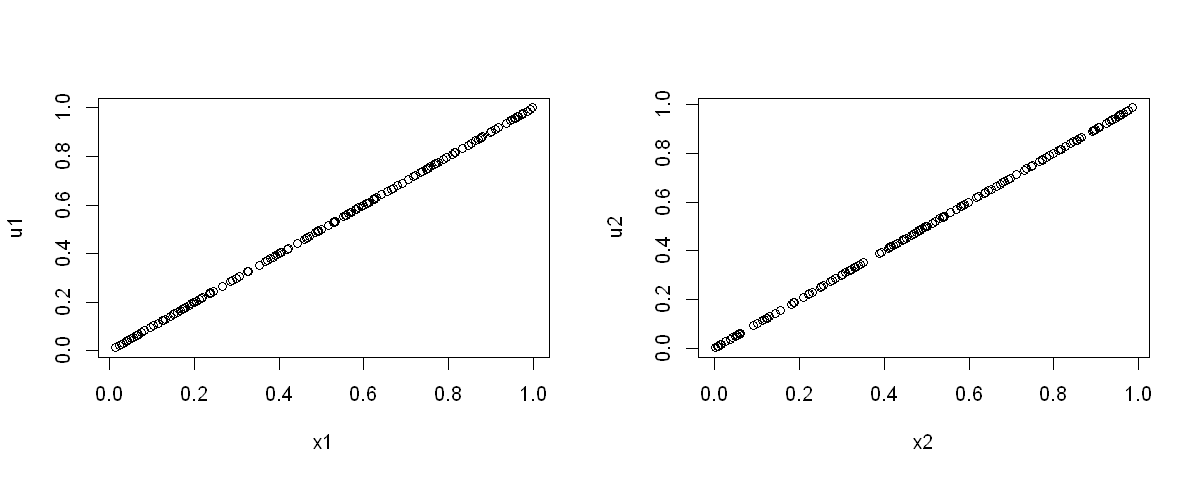

In [76]:
# u1<-pstd(finance_res,0,1,nu=65.137)
# u1<-pstd(finance_res,0,1)
# u1<-psged(finance_res,-0.00131883442936871,0.0308661422033981,nu=1.87603616914375, xi=0.884831410447574)#概率积分转换
u1<-pstd(energy_res,mean(energy_res), sd(energy_res), 29.75)#概率积分转换
# u2<-psged(energy_res,0.00705481099771863,0.0424937273475525,nu=1.82289502225349, xi=1.07773775793916)#概率积分转换
# u2<-pstd(energy_res,0,1,nu=7.884)
# u2<-pstd(energy_res,0,1)
u2 = pnorm(finance_res, mean(finance_res), sd(finance_res), 4.01605807783805)
#psstd(q, mean = 0, sd = 1, nu = 5, xi = 1.5)
#nu为偏t分布的自由度，xi为偏度系数

x1<-as.matrix(u1)
x2<-as.matrix(u2)
ks.test(x1,'punif')
ks.test(x2,'punif')
# #K-S检验,原假设为u1、u2服从均匀分布
options(repr.plot.width = 10, repr.plot.height = 4)
par(mfrow = c(1, 2))
p1 = qqplot(x1,u1)
p2 = qqplot(x2,u2)
par(mfrow = c(1, 1)) # return to the default



In [84]:
library(dplyr)
library(ggplot2)
data.frame(energy=u1, finance=u2)

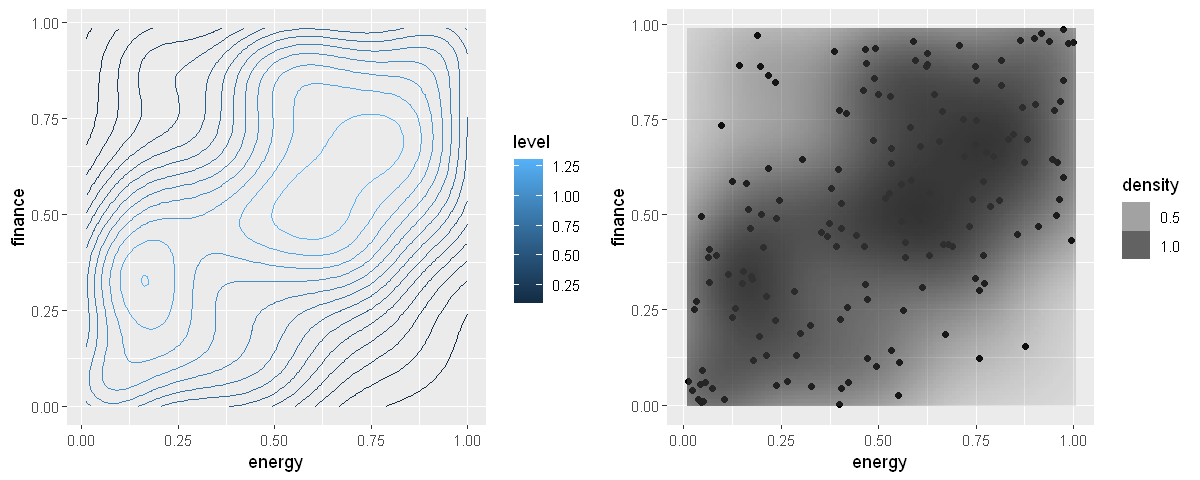

In [97]:
p1 <- ggplot()
# 基函数
p1 = ggplot(data.frame(energy=u1, finance=u2), aes(x = energy, y = finance)) +
  # 密度图函数：colour设置等高线颜色
  stat_density2d(aes(colour = ..level..))

p2 <- ggplot()
p2 =ggplot(data.frame(energy=u1, finance=u2), aes(x = energy, y = finance)) +
  # 散点图函数
  geom_point() +
  # 密度图函数：alpha设置填充透明度数据为密度，geom设置绘制栅格图
  stat_density2d(aes(alpha = ..density..), geom = "raster", contour = FALSE)

options(repr.plot.width = 10, repr.plot.height = 4)

grid.arrange(p1, p2, ncol = 2, widths = c(0.4, 0.4), heights = c(0.6))

Family
------ 
No:    9
Name:  BB7

Parameter(s)
------------
par:  1.23  (SE = 0.12)
par2: 0.61  (SE = 0.15)
Dependence measures
-------------------
Kendall's tau:    0.3 (empirical = 0.34, p value < 0.01)
Upper TD:         0.24 
Lower TD:         0.32 

Fit statistics
--------------
logLik:  22.13 
AIC:    -40.27 
BIC:    -34.12 



In [78]:
# data.frame(col1=u1)

In [120]:
Cop1=BiCopSelect(u1,u2,familyset = c(1, 2, 3, 4, 5, 6, 7, 9),se =TRUE, rotations = FALSE)
#Copula估计，se表示计算标准误， rotation表示是否考虑旋转Copula，选择标准默认是AIC
#familyset是copula类型集合，主要是选择几种常见的copula族（norm t clayton gumbel frank SJC）
summary(Cop1)#查看估计结果
#对于依赖参数和尾部相关系数、秩相关系数间的转换，可以使用BiCopPar2TailDep和BiCopPar2Tau函数

Family
------ 
No:    1
Name:  Gaussian

Parameter(s)
------------
par:  0.5  (SE = 0.05)

Dependence measures
-------------------
Kendall's tau:    0.34 (empirical = 0.34, p value < 0.01)
Upper TD:         0 
Lower TD:         0 

Fit statistics
--------------
logLik:  23.31 
AIC:    -44.61 
BIC:    -41.54 



In [129]:
c = 1
Cop1=BiCopSelect(u1,u2,familyset = c(c),se =TRUE, rotations = FALSE)
#Copula估计，se表示计算标准误， rotation表示是否考虑旋转Copula，选择标准默认是AIC
#familyset是copula类型集合，主要是选择几种常见的copula族（norm t clayton gumbel frank SJC）
summary(Cop1)#查看估计结果
#对于依赖参数和尾部相关系数、秩相关系数间的转换，可以使用BiCopPar2TailDep和BiCopPar2Tau函数

Family
------ 
No:    1
Name:  Gaussian

Parameter(s)
------------
par:  0.5  (SE = 0.05)

Dependence measures
-------------------
Kendall's tau:    0.34 (empirical = 0.34, p value < 0.01)
Upper TD:         0 
Lower TD:         0 

Fit statistics
--------------
logLik:  23.31 
AIC:    -44.61 
BIC:    -41.54 



In [113]:
# help(BiCopSelect)

Warning message:
"package 'psych' was built under R version 4.3.3"

Attaching package: 'psych'


The following object is masked from 'package:ramify':

    tr


The following object is masked from 'package:Rfast':

    skew


The following objects are masked from 'package:ggplot2':

    %+%, alpha




,energy,finance
energy,1.0000000,0.4900592
finance,0.4900592,1.0000000


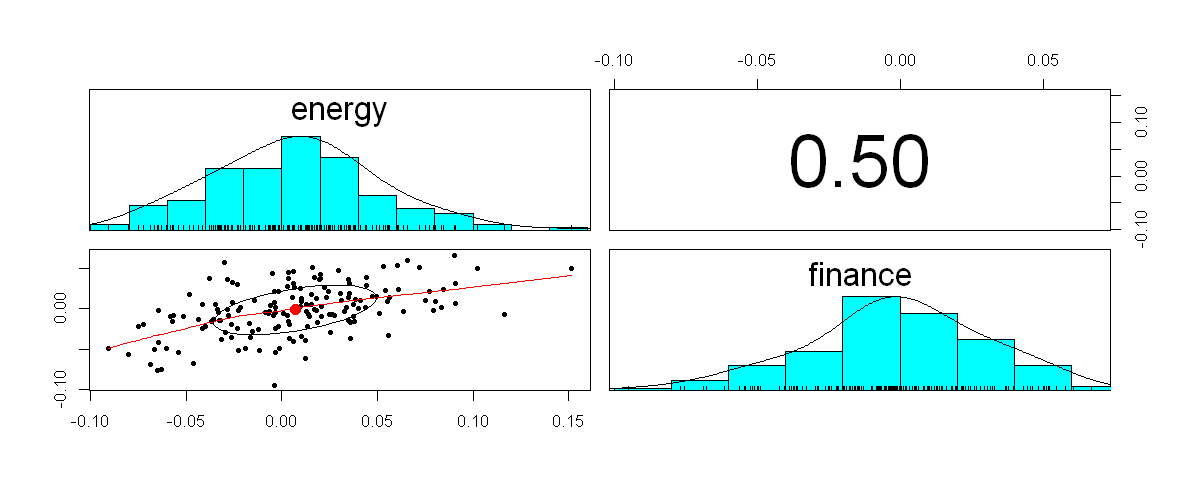

In [130]:
library(psych)
data1 = data.frame(energy=energy_res, finance=finance_res)
cor(data1, method='spearman')
pairs.panels(data1)
# The lower off diagonal draws scatter plots, the diagonal histograms, the upper off diagonal reports the Pearson correlation (with pairwise deletion).

,energy,finance
energy,1.0000000,0.4900592
finance,0.4900592,1.0000000


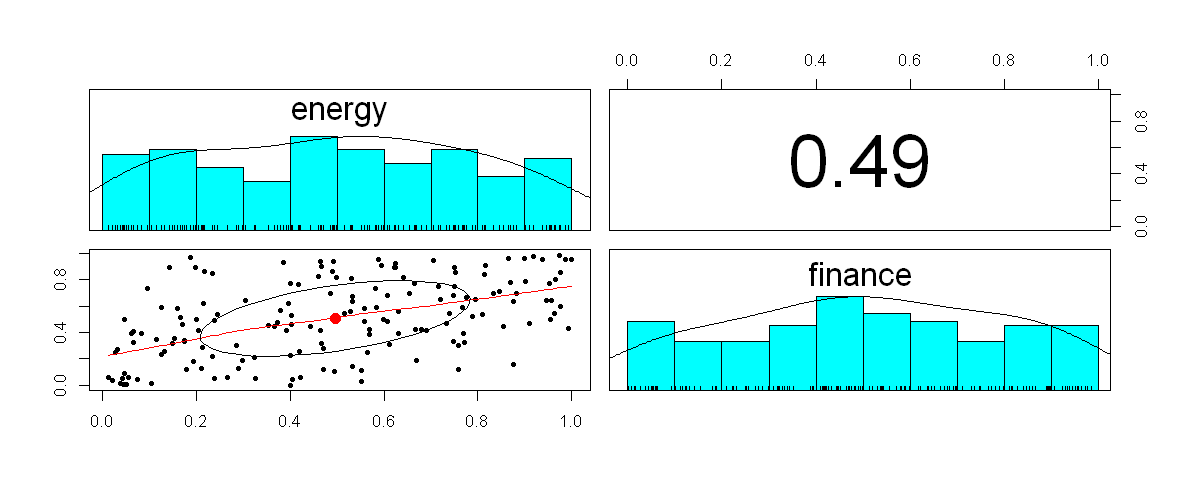

In [131]:
library(psych)
data1 = data.frame(energy=u1, finance=u2)
cor(data1, method='spearman')
pairs.panels(data1)
# The lower off diagonal draws scatter plots, the diagonal histograms, the upper off diagonal reports the Pearson correlation (with pairwise deletion).